In [1]:
import xarray as xr
import pandas as pd
import xclim

vars = ['T','PRENEI', 'PRELIQ', 'FF', 'HU']

ds_t = xr.open_dataset('data-combined/QUOT_SIM2_var_T.nc', engine='netcdf4', chunks={})
ds_pr = xr.open_dataset('data-combined/QUOT_SIM2_var_PR.nc', engine='netcdf4', chunks={})
ds_ff = xr.open_dataset('data-combined/QUOT_SIM2_var_FF.nc', engine='netcdf4', chunks={})
ds_hu = xr.open_dataset('data-combined/QUOT_SIM2_var_HU.nc', engine='netcdf4', chunks={})


In [2]:
from dask.diagnostics import ProgressBar

In [ ]:
from pyproj import Transformer
import numpy as np

transformer = Transformer.from_crs("EPSG:2154", "EPSG:4326", always_xy=True)

x1 = ds_t['x'].values
y1 = ds_t['y'].values
y1 = y1.reshape(-1,1)
x1 = x1.reshape(1,-1)

ones = np.ones((134,142))
xlon = np.multiply(ones,x1)
ylat = np.multiply(ones,y1)
lat,lon = transformer.transform(xx=xlon, yy=ylat)

In [ ]:
lon_flat = lon.reshape(x1.shape)
lat_flat = lat.reshape(y1.shape)

In [ ]:
len(ds_t['x'].values)


In [ ]:
len(ds_t['y'].values)

In [3]:
ds_t['T'].attrs['units'] = 'degC'
ds_pr['PR'].attrs['units'] = 'mm/day'
ds_ff['FF'].attrs['units'] = 'm/s'
ds_hu['HU'].attrs['units'] = '%'
ds_t['y'].attrs['units'] = ''

In [ ]:
_,_,_,_,_,ds_t['FWI'] = xclim.indicators.atmos.cffwis_indices(ds_t.T, ds_pr.PR, ds_ff.FF, ds_hu.HU, ds_t.y)

In [ ]:
with ProgressBar():
    ds_t['FWI'].to_netcdf('data-results/FWI.nc', engine='netcdf4')
    #ds_fwi.compute()

In [6]:
with ProgressBar():
    ds_t['HI'] = xclim.indicators.convert.heat_index(ds_t.T, ds_hu.HU)
    ds_t['HI'].to_netcdf('data-results/HI.nc', engine='netcdf4')

[                                        ] | 0% Completed | 102.91 ms

c:\DEVS\HACKATON\.venv\Lib\site-packages\xclim\core\cfchecks.py:79: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


[########################################] | 100% Completed | 47.56 s


In [ ]:
ds_prenei['PR'] = ds_prenei['PRENEI'] + ds_preliq['PRELIQ']


In [ ]:
ds_fwi['FWI'].to_netcdf('data-combined/QUOT_SIM2_var_PR.nc', engine='netcdf4')

In [ ]:
ds_t.y

ds_hu['HU'].head()

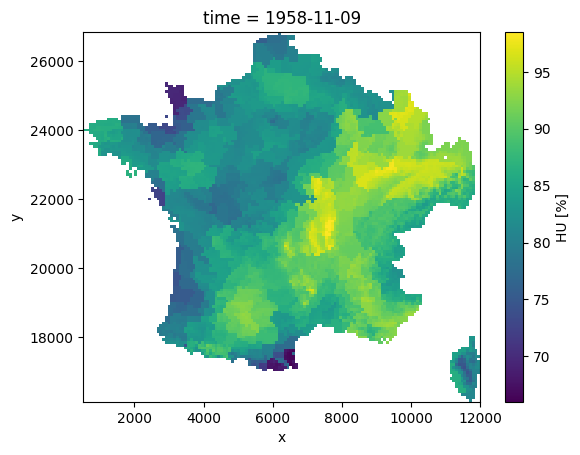

In [7]:
ds_hu['HU'].isel(time=100).plot()